Serious environmental hazards include wildfires, which often badly hit the economy, environment, and human beings. Estimating the Fire size would help in minimizing damages.
This project makes use of regression models for predicting the fire size based on the historical data available for wildfires.


In [ ]:
import pandas as pd

dataset = pd.read_csv('cleaned_wildfire_dataset.csv')

target_column = 'FIRE_SIZE'

# creating diff columns for categorical and numerical values
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns


<ipython-input-1-29674128dd26>:3: DtypeWarning: Columns (7,9,10,11,12,13,14,22,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('cleaned_wildfire_dataset.csv')


In [ ]:
dataset.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,PNF-47,...,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,2,Winter,0.0
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,5,Spring,0.0
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,021,...,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,5,Spring,0.0
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,6,...,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,6,Summer,5.0
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,7,...,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,6,Summer,5.0


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

dataset[numerical_columns] = imputer_num.fit_transform(dataset[numerical_columns])
dataset[categorical_columns] = imputer_cat.fit_transform(dataset[categorical_columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoders = {}
for col in categorical_columns:
    dataset[col] = dataset[col].astype(str)  # Convert all categorical columns to strings
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DISCOVERY_MONTH,DISCOVERY_SEASON,FIRE_DURATION
0,1.0,1.0,0,2,5,344,1503,888,3743,889571,30120,270833,1086,9272,919,2005.0,4781,33.0,1300.0,0,9,1,4773,33.0,1730.0,0.10,0,40.036944,-121.005833,16,4,340,6063.0,1292,2.0,3,0.0
1,2.0,2.0,0,2,5,293,583,873,1469,103925,17838,542505,1086,9272,919,2004.0,4515,133.0,845.0,2,7,1,4507,133.0,1530.0,0.25,0,38.933056,-120.404444,16,4,337,6061.0,1289,5.0,1,0.0
2,3.0,3.0,0,2,5,293,583,873,1469,27981,12105,608102,1086,9272,919,2004.0,4534,152.0,1921.0,0,1,1,4526,152.0,2024.0,0.10,0,38.984167,-120.735556,13,4,157,6017.0,527,5.0,1,0.0
3,4.0,4.0,0,2,5,293,583,873,1469,414995,59061,226019,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1400.0,0.10,0,38.559167,-119.913333,16,4,257,6003.0,31,6.0,2,5.0
4,5.0,5.0,0,2,5,293,583,873,1469,451497,59061,626258,1086,9272,919,2004.0,4562,180.0,1600.0,2,7,1,4559,185.0,1200.0,0.10,0,38.559167,-119.933056,16,4,257,6003.0,31,6.0,2,5.0



Correlation Matrix


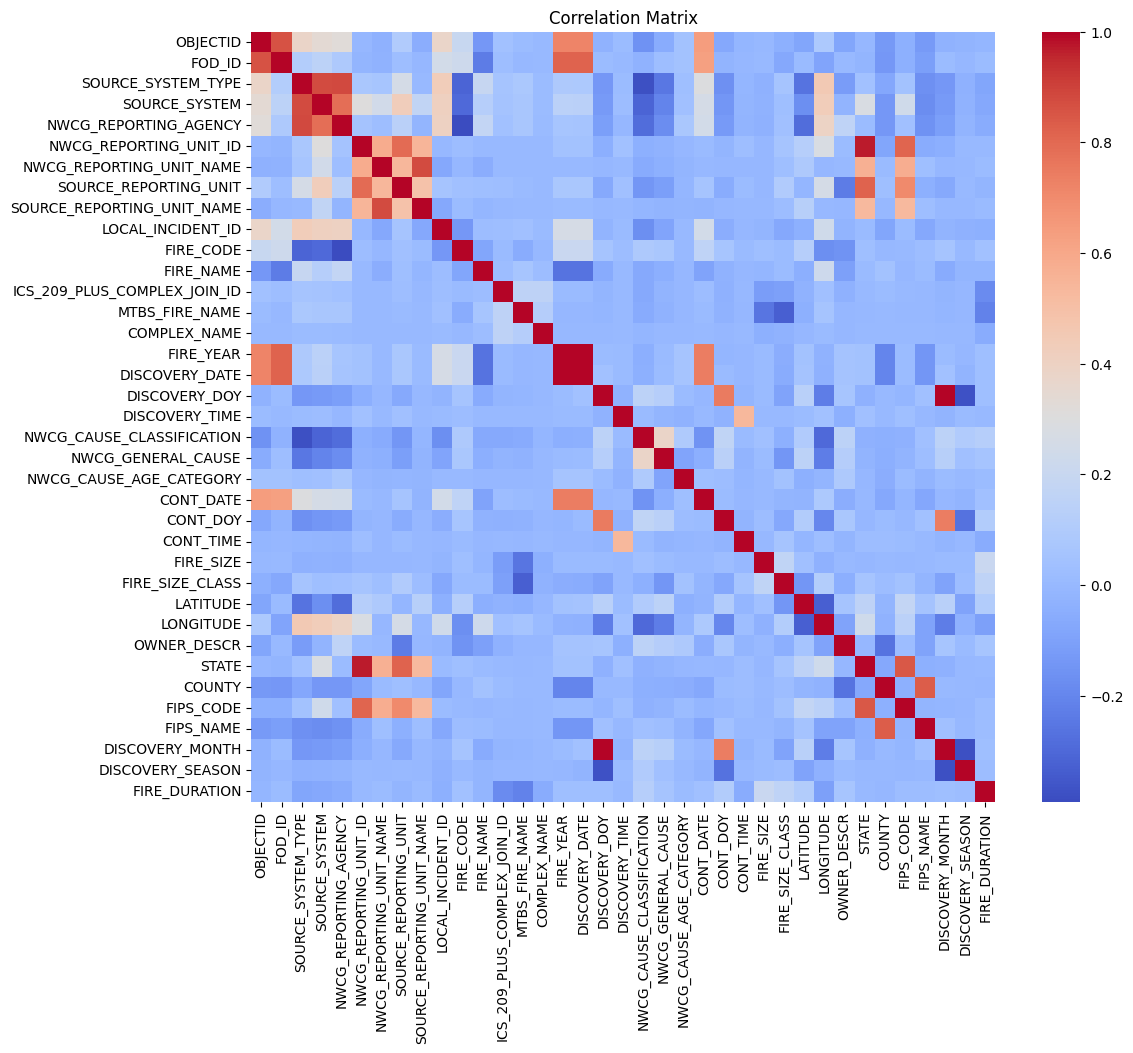

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nCorrelation Matrix")
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[numerical_columns])
dataset[numerical_columns] = scaled_features


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=[target_column])  # Features
y = dataset[target_column]                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

**Random Forest Regressor**

Random Forest Regressor handles non-linear interactions better and ranks feature importance.

In [ ]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Running on GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Running on CPU.")


CUDA is available. Running on GPU: Tesla T4


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)
rf_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_pred_linear = linear_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)

evaluate_model(y_test, y_pred_linear, "Linear Regression")

Evaluation Metrics for Linear Regression:
Mean Absolute Error (MAE): 0.0874
Mean Squared Error (MSE): 0.7403
Root Mean Squared Error (RMSE): 0.8604
R^2 Score: 0.1065
----------------------------------------



The MAE of the fire size projections is about 0.1388 units. While a low MAE usually indicates more accuracy in predictions, the value in this case indicates there is some appreciable error in the model's projections.


Because MSE squares the difference, it severely punishes larger errors. The MSE of 2.0607 would tell us that the model predictions are moderately wrong; in reality, however, there is often much more significant disparity between projected versus actual fire size.



In [ ]:
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Both Linear and random forst models have moderate prediction errors, and the R² scores indicate that neither model is able to explain a large proportion of the variance in fire size. More advanced features or models might be needed to improve performance and better capture the factors that influence fire size.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, gb_preds)
mse_gb = mean_squared_error(y_test, gb_preds)
rmse_gb = mean_squared_error(y_test, gb_preds, squared=False)
r2_gb = r2_score(y_test, gb_preds)

print("Gradient Boosting Regression:")
print(f"MAE: {mae_gb:.4f}")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gb_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (Gradient Boosting Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

feature_importances_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Gradient Boosting):")
print(feature_importances_gb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_gb, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

**XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42, tree_method='gpu_hist')  # Use 'gpu_hist' for GPU acceleration

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, xgb_preds)
mse_xgb = mean_squared_error(y_test, xgb_preds)
rmse_xgb = mean_squared_error(y_test, xgb_preds, squared=False)
r2_xgb = r2_score(y_test, xgb_preds)

print("XGBoost Regression:")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (XGBoost):")
print(feature_importances_xgb)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances_xgb, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

**Support Vector Regression (SVR)**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVR model with an RBF (Radial Basis Function) kernel
svr_model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)

svr_model.fit(X_train, y_train)

svr_preds = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, svr_preds)
mse_svr = mean_squared_error(y_test, svr_preds)
rmse_svr = mean_squared_error(y_test, svr_preds, squared=False)
r2_svr = r2_score(y_test, svr_preds)

print("Support Vector Regression:")
print(f"MAE: {mae_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (SVR)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

**K-Nearest Neighbors Regression (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_preds = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, knn_preds)
mse_knn = mean_squared_error(y_test, knn_preds)
rmse_knn = mean_squared_error(y_test, knn_preds, squared=False)
r2_knn = r2_score(y_test, knn_preds)

print("K-Nearest Neighbors Regression:")
print(f"MAE: {mae_knn:.4f}")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (KNN)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

residuals = y_test - knn_preds

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title("Residuals Distribution (KNN)")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.show()

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)

dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, dt_preds)
mse_dt = mean_squared_error(y_test, dt_preds)
rmse_dt = mean_squared_error(y_test, dt_preds, squared=False)
r2_dt = r2_score(y_test, dt_preds)

print("Decision Tree Regression:")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_preds, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted (Decision Tree)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

residuals = y_test - dt_preds

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title("Residuals Distribution (Decision Tree)")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
